In [ ]:
#!pip uninstall -y fbprophet
#!pip uninstall -y pystan
#!pip install fbprophet
#!pip install pystan==2.19.1.1

In [ ]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# Para baixar os dados
import yfinance as yf


#Para aplicar o ARIMA:
from statsmodels.tsa.stattools import adfuller          #verificar dados estacionários
from statsmodels.tsa.stattools import acf, pacf         #correlação
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposição sazonal usando médias móveis.
from statsmodels.tsa.arima.model import ARIMA           #algoritmo arima

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Prophet
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
df = pd.read_excel('/content/Dados Históricos - Ibovespa.xlsx')

In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
1,2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2,2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
3,2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
4,2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [ ]:
from datetime import datetime

In [ ]:
df.head(5)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
1,2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2,2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
3,2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
4,2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1242 non-null   datetime64[ns]
 1   Último    1242 non-null   int64         
 2   Abertura  1242 non-null   int64         
 3   Máxima    1242 non-null   int64         
 4   Mínima    1242 non-null   int64         
 5   Vol.      1242 non-null   object        
 6   Var%      1242 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 68.0+ KB


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])


In [ ]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
1,2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2,2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
3,2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
4,2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [ ]:
df_ibovespa = df

In [ ]:
df.info()

In [ ]:
df.index = pd.to_datetime(df.Data, format = "%m-%d-%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2019-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    1242 non-null   int64  
 1   Abertura  1242 non-null   int64  
 2   Máxima    1242 non-null   int64  
 3   Mínima    1242 non-null   int64  
 4   Vol.      1242 non-null   object 
 5   Var%      1242 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 67.9+ KB


In [ ]:
df.head()

,Data,Último
Data,,
2019-02-01,2019-02-01,134.185
2019-03-01,2019-03-01,134.194
2019-04-01,2019-04-01,133.533
2019-07-01,2019-07-01,132.753
2019-08-01,2019-08-01,132.182


In [ ]:
df.drop("Data", inplace= True, axis=1)

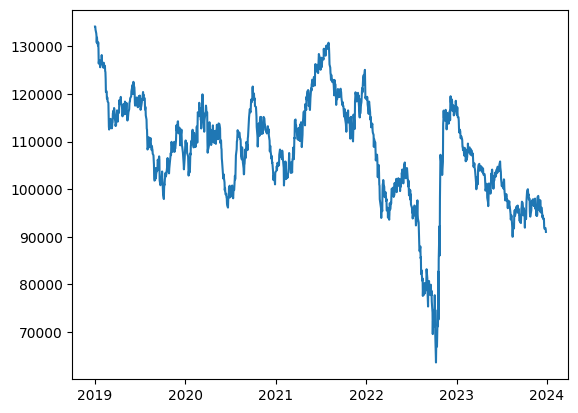

In [ ]:
plt.plot(df.index, df.Último)

In [ ]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
df_limpo = df


In [ ]:
df_limpo.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1242 entries, 2019-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    1242 non-null   int64  
 1   Abertura  1242 non-null   int64  
 2   Máxima    1242 non-null   int64  
 3   Mínima    1242 non-null   int64  
 4   Vol.      1242 non-null   object 
 5   Var%      1242 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 67.9+ KB


In [ ]:
df_limpo = df.drop(columns=['Abertura','Máxima','Mínima','Vol.','Var%'])

In [ ]:
df_limpo.head()

,Último
Data,
2019-01-02,134185
2019-01-03,134194
2019-01-04,133533
2019-01-07,132753
2019-01-08,132182


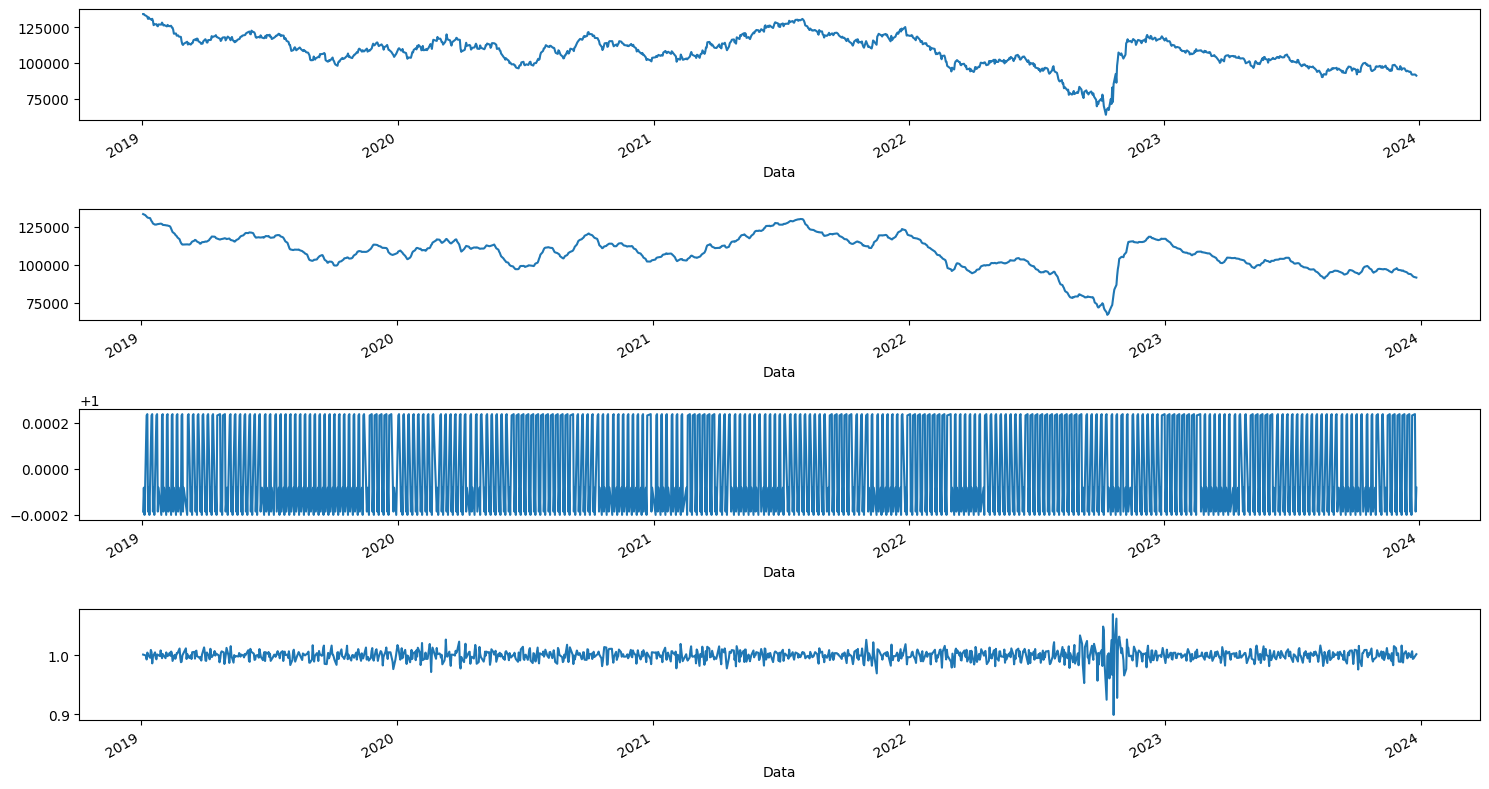

In [ ]:
seasonplot = seasonal_decompose(df_limpo, model='multiplicative', period=5) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2)    #tendencia
seasonplot.seasonal.plot(ax=ax3) #sazonalisade
seasonplot.resid.plot(ax=ax4)    #residuos
plt.tight_layout()

In [ ]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,MA_window_10,MA_window_20
Data,,,,,,,,
2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001,NaN,NaN
2019-01-03,134194,133523,134195,133328,"6,17M",0.0049,NaN,NaN
2019-01-04,133533,132753,133645,132753,"5,15M",0.0059,NaN,NaN
2019-01-07,132753,132182,133035,132094,"8,23M",0.0043,NaN,NaN
2019-01-08,132182,130826,132277,130822,"8,68M",0.0105,NaN,NaN


In [ ]:
df_limpo.head()

,Último
Data,
2019-01-02,134185
2019-01-03,134194
2019-01-04,133533
2019-01-07,132753
2019-01-08,132182


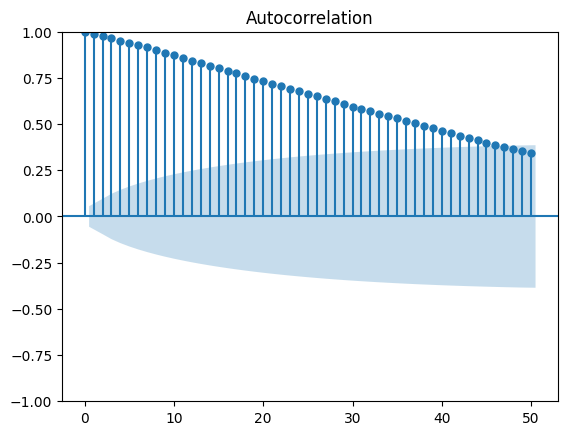

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df_limpo, lags=50)
plt.show()

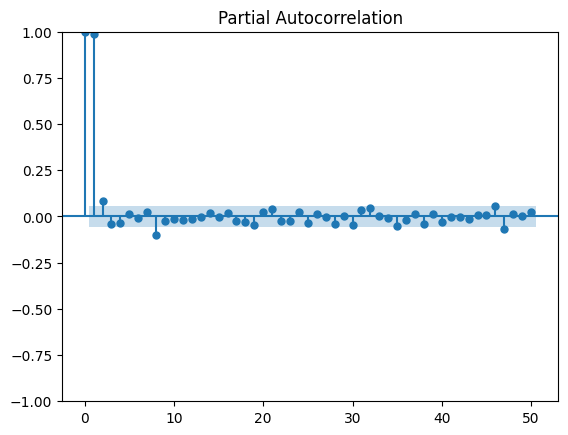

In [ ]:
sm.graphics.tsa.plot_pacf(df_limpo, lags=50)
plt.show()

In [ ]:
rolmean = df_limpo.rolling(window=12).mean() #média móvel em 12 meses (dando a média móvel no nível anual).
rolstd = df_limpo.rolling(window=12).std()   #Desvio padrão em 12 meses
print(rolmean,rolstd)

                  Último
Data                    
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
...                  ...
2023-12-21  94595.916667
2023-12-22  94191.000000
2023-12-26  93919.166667
2023-12-27  93548.666667
2023-12-28  93124.916667

[1242 rows x 1 columns]                  Último
Data                   
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
...                 ...
2023-12-21  1290.557910
2023-12-22  1378.266434
2023-12-26  1498.479158
2023-12-27  1484.092029
2023-12-28  1414.654693

[1242 rows x 1 columns]


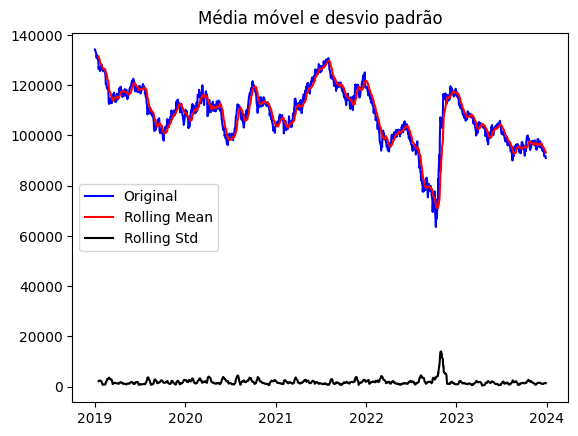

In [ ]:
#Plotando a média móvel
orig = plt.plot(df_limpo, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Média móvel e desvio padrão')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Teste de estacionariedade (ADF Test)
adf_result = adfuller(df_limpo['Último'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Resultados do Teste de Estacionariedade:')
print('--------------------------------------')
print('Teste Estatístico:', adf_result[0])
print('Valor-p:', adf_result[1])
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.9952483287179024
p-value: 0.035340535663288083
Resultados do Teste de Estacionariedade:
--------------------------------------
Teste Estatístico: -2.9952483287179024
Valor-p: 0.035340535663288083
Valores Críticos:
   1%: -3.4356646522289815
   5%: -2.863886926389418
   10%: -2.568019536239491


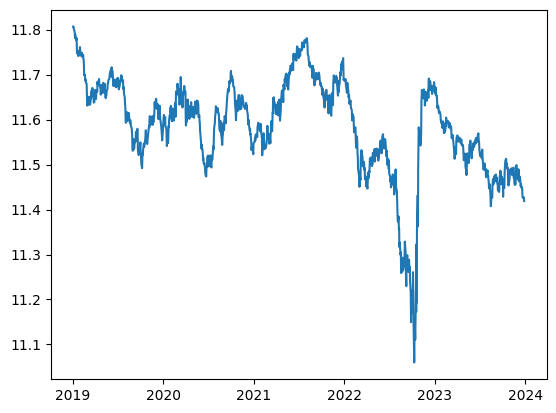

In [ ]:
#Estimating trend
indexedDataset_logScale = np.log(df_limpo) #Transformação logarítma
plt.plot(indexedDataset_logScale)

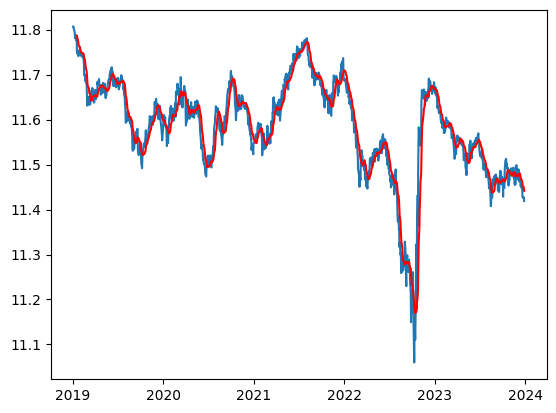

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Último
Data,
2019-01-17,-0.039080
2019-01-18,-0.030388
2019-01-21,-0.024457
2019-01-22,-0.028190
2019-01-23,-0.026666
2019-01-24,-0.013132
2019-01-28,-0.011331
2019-01-29,0.001858
2019-01-30,-0.002406


In [ ]:
def test_stationarity(timeseries):

    #Determinar estatísticas contínuas
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot estatísticas contínuas
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Performance do Dickey–Fuller:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Último'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


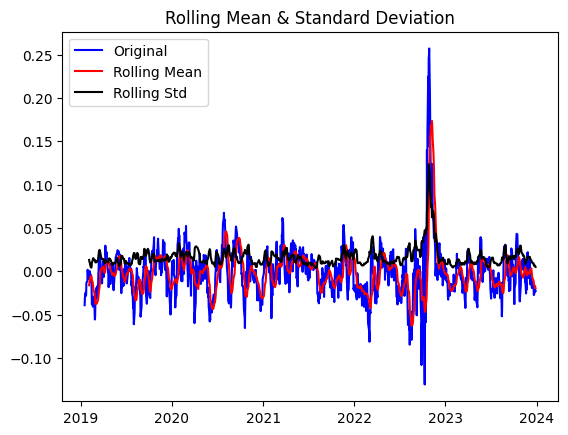

Results of Dickey Fuller Test:
Test Statistic                -8.705948e+00
p-value                        3.700062e-14
#Lags Used                     7.000000e+00
Number of Observations Used    1.223000e+03
Critical Value (1%)           -3.435708e+00
Critical Value (5%)           -2.863906e+00
Critical Value (10%)          -2.568030e+00
dtype: float64


In [ ]:

test_stationarity(datasetLogScaleMinusMovingAverage)


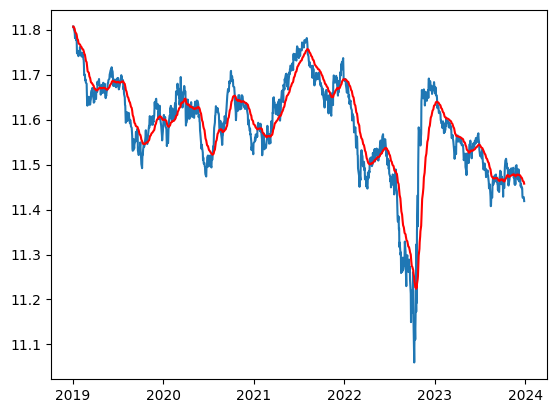

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

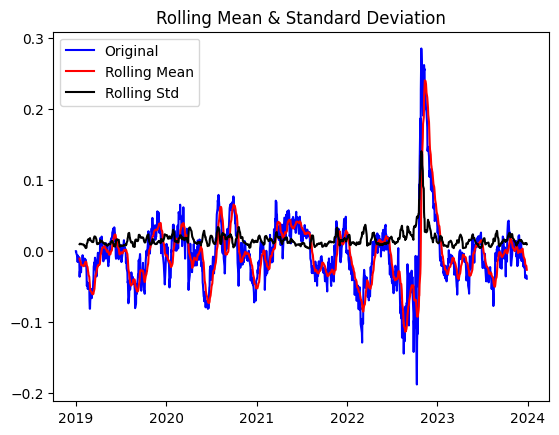

Results of Dickey Fuller Test:
Test Statistic                   -5.501936
p-value                           0.000002
#Lags Used                        8.000000
Number of Observations Used    1233.000000
Critical Value (1%)              -3.435665
Critical Value (5%)              -2.863887
Critical Value (10%)             -2.568020
dtype: float64


In [ ]:

datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

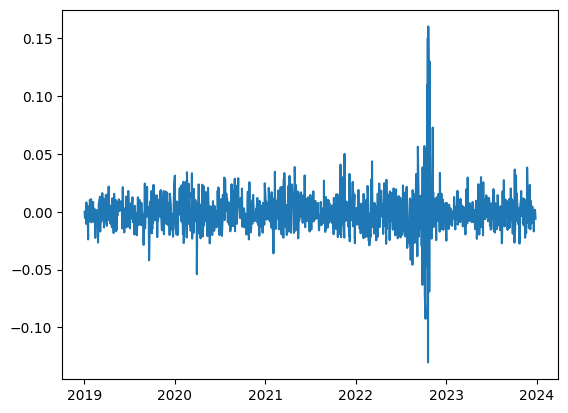

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift() #diferença entre o valor anterior e o atual
plt.plot(datasetLogDiffShifting)

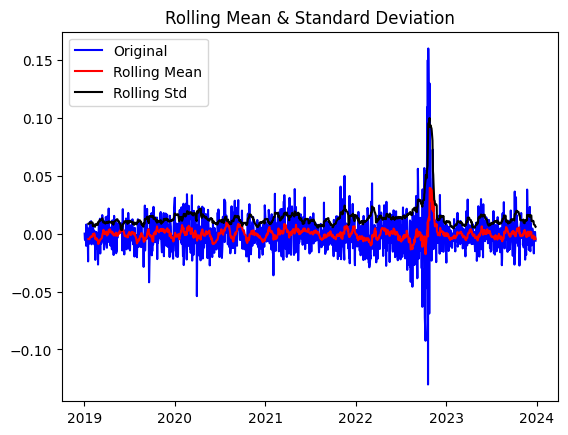

Results of Dickey Fuller Test:
Test Statistic                -1.076500e+01
p-value                        2.465493e-19
#Lags Used                     7.000000e+00
Number of Observations Used    1.233000e+03
Critical Value (1%)           -3.435665e+00
Critical Value (5%)           -2.863887e+00
Critical Value (10%)          -2.568020e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

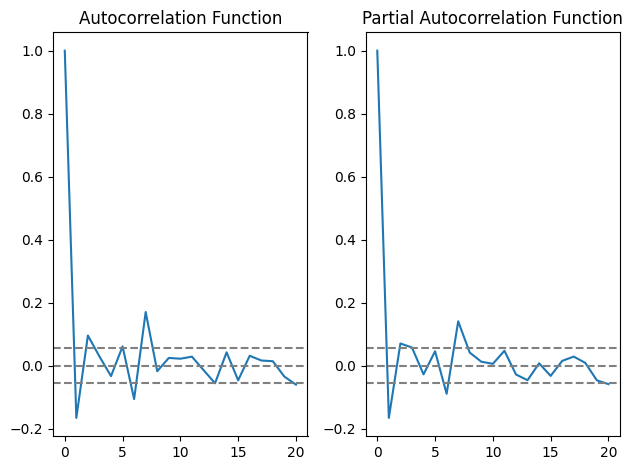

In [ ]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [ ]:
#! pip install --upgrade statsmodels

Plotting AR model


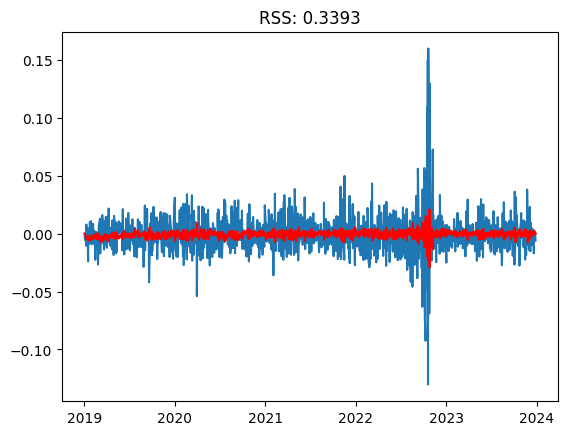

In [ ]:
#AR Model
model = ARIMA(datasetLogDiffShifting, order=(2,1,2))#(p,d,q)
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Último'])**2))
print('Plotting AR model')

In [ ]:
from sklearn.metrics import mean_absolute_error

# Obtenha as previsões
predictions = results_AR.fittedvalues

# Ajuste os índices para garantir correspondência
predictions.index = datasetLogDiffShifting.index

# Inverta a diferenciação
# (indexedDataset_logScale['Close'].iloc[0]) para inverter a diferenciação.
# np.cumsum(predictions) é usado para calcular a soma cumulativa das previsões.
predicted_values = indexedDataset_logScale['Último'].iloc[0] + np.cumsum(predictions)

# Calcule o MAPE
mape = mean_absolute_error(datasetLogDiffShifting['Último'], predicted_values) * 10

print(f"MAPE: {mape:.2f}%")

MAPE: 111.81%
